In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Machine Learning 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Importing and EDA

In [119]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

print(train.shape)
print(test.shape)
print(train)

(42000, 785)
(28000, 28, 28, 1)
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


#### *Checking for null values just to be sure*

In [120]:
for col in train_data.columns:
    if train_data[col].isna().sum() > 0:
        print(train_data[col].isna().sum())
        
# No null values

## Pre-Processing

#### *Separating labels from the data*

In [121]:
X = train_data.drop(['label'], axis=1).values
X.shape

(42000, 784)

In [122]:
y = train_data.label.values
y.shape

(42000,)

In [123]:
test = test_data.values
test.shape

(28000, 784)

#### *Transferring the data to a numpy array*

## Visualisation

In [124]:
# Reshaping our data
X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

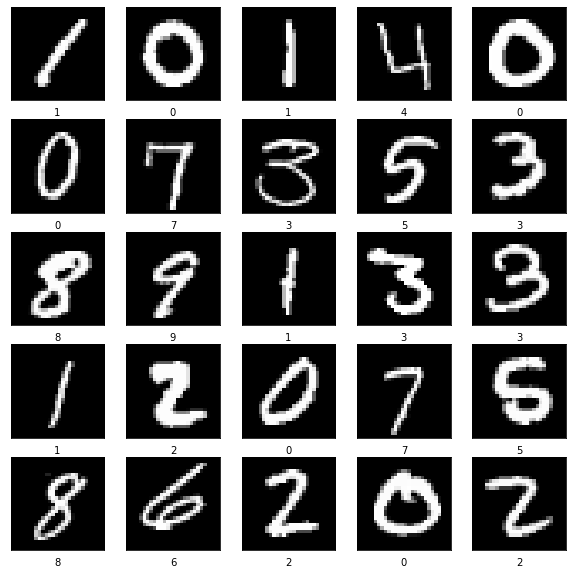

In [125]:
plt.figure(figsize=(10,10))
for i, img in enumerate(X[:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap='gray')
    plt.xlabel(train_data['label'][i])
plt.show()



## Model Building

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [127]:
# Splitting into our training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
# Converting vector to binary class matrices

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#### *Defining our model / compiling and fitting*

In [129]:
# Defining our model
input_shape = (28, 28, 1)
model = Sequential()

model.add(Conv2D(32, activation='relu', kernel_size=(3, 3), input_shape=(input_shape)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, activation='relu', kernel_size=(3, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(10, activation='softmax'))

In [130]:
# Compiling and fitting to the train set
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
230/230 [==============================] - 10s 42ms/step - loss: 2.0613 - accuracy: 0.7280
Epoch 2/20
230/230 [==============================] - 8s 36ms/step - loss: 0.3330 - accuracy: 0.9024
Epoch 3/20
230/230 [==============================] - 8s 36ms/step - loss: 0.2312 - accuracy: 0.9315
Epoch 4/20
230/230 [==============================] - 8s 36ms/step - loss: 0.1866 - accuracy: 0.9437
Epoch 5/20
230/230 [==============================] - 9s 39ms/step - loss: 0.1550 - accuracy: 0.9535
Epoch 6/20
230/230 [==============================] - 8s 36ms/step - loss: 0.1440 - accuracy: 0.9563
Epoch 7/20
230/230 [==============================] - 8s 36ms/step - loss: 0.1298 - accuracy: 0.9604
Epoch 8/20
230/230 [==============================] - 9s 39ms/step - loss: 0.1208 - accuracy: 0.9638
Epoch 9/20
230/230 [==============================] - 8s 36ms/step - loss: 0.1106 - accuracy: 0.9667
Epoch 10/20
230/230 [==============================] - 8s 36ms/step - loss: 0.1040 - accur

#### *Evaluating* 

In [131]:
# Evaluating our model
results = model.evaluate(X_test, y_test, batch_size=20, verbose=0)
print(f'Test loss:{results[0]} \nTest accuracy:{results[1]}')

Test loss:0.04958302900195122 
Test accuracy:0.9861111044883728


dict_keys(['loss', 'accuracy'])


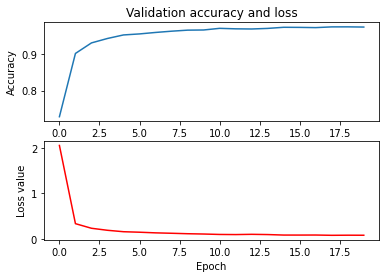

In [132]:
# print keys for pretrained_cnn_history dict
print(history.history.keys())

fig = plt.figure(1)
plt.subplot(211)
# plot the validation accuracy
plt.plot(history.history['accuracy'])
plt.title('Validation accuracy and loss')
plt.ylabel('Accuracy')
plt.subplot(212)
# plot the validation loss
plt.plot(history.history['loss'], 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss value');

#### *Predictions and Submission*

In [133]:
# Making our predictions
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)

In [134]:
#submission_data = {'Id': test_data(range(1,28001)), 'label': y_pred}
#digit_recognized = pd.DataFrame(submission_data)

#digit_recognized.to_csv('digit_recognizer.csv', index=False)